# Analyzing correspondence networks with CorrNet

## Importing the package

In [1]:
import corrnet
from IPython.display import display

## Loading and inspecting the correspondence data

### Loading the data

In [2]:
letter_manager = corrnet.LetterManager('data/letter_data.csv', date_col='Date',
                                       sender_col='Sender', addressee_col='Receiver',
                                       subject_col='Written for', provenance_col='Institution',
                                       type_col='Recommendation Type')

### Check if there are letters with bad dates

In [25]:
bad_letter_data = letter_manager.bad_letter_data()
display(bad_letter_data)

,Institution,Written for,Sender,Receiver,Date,Recommendation Type
0,American Friends Service Committee,Frankel Edgar,Marx F. A.,Frankel Edgar,NaN,I
1,American Friends Service Committee,Barschak Erna,Salomon Alice,Barschak Erna,NaN,X
53,Bleichroeder,Klaess Leopold,Swaine Leopold Victor,Bleichroeder (Firma),1883-28,X


### Display earlierst and latest date

In [4]:
print(f'Earliest date: {letter_manager.earliest_date()}.')
print(f'Latest date: {letter_manager.latest_date()}.')

Earliest date: 1839-11-17 00:00:00.
Latest date: 1946-05-24 00:00:00.


### Plot the date distribution
#### a) Aggregated over all letters

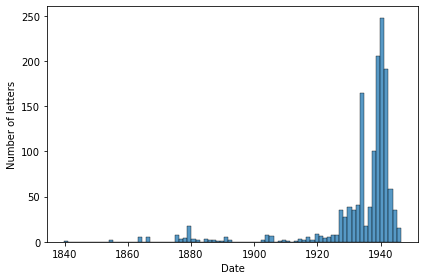

In [5]:
letter_manager.plot_date_distribution(save_as='date_distr.pdf')

#### b) Seperated by letter type

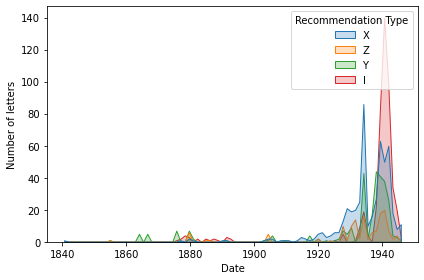

In [6]:
letter_manager.plot_date_distribution(by_type=True)

## Carrying out network analyses
### Generated directed graph from letter data

In [3]:
g = letter_manager.to_digraph(earliest_date='1933-01-30', latest_date='1945-05-08', subjects_as_nodes=False)

### Plot the in- and out-neighbors of a selected node.

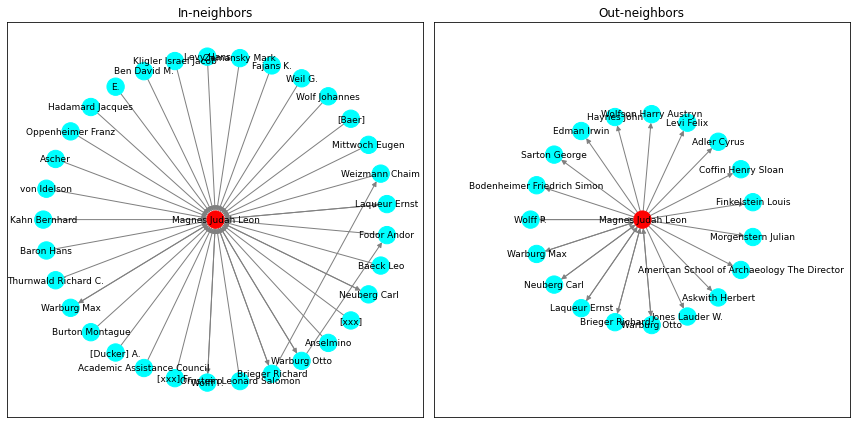

In [4]:
node = 'Magnes Judah Leon'
corrnet.plot_neighborhood(g, node, margins=(None, .35))

### Plot degree distributions

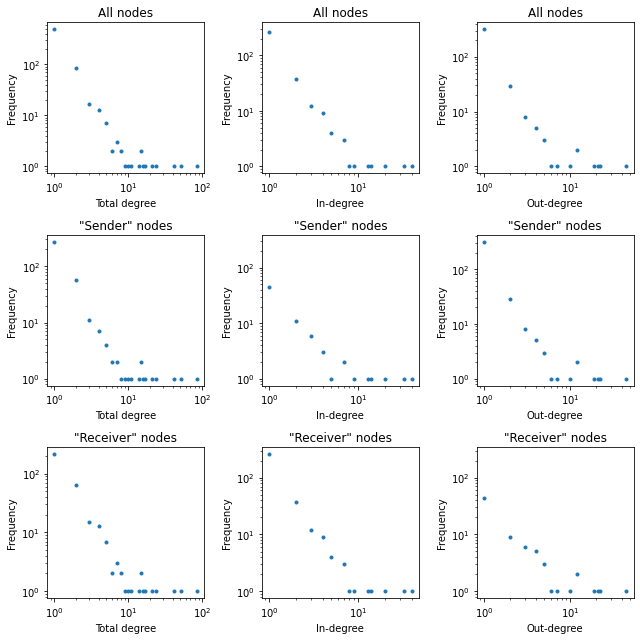

In [8]:
corrnet.plot_degree_distributions(g, save_as='degrees.pdf')

### Compute Pagerank centralities

In [9]:
pageranks = corrnet.compute_pagerank(g, k=10)

### Display most important receiver nodes

In [10]:
print('Most important receiver nodes:')
for i, t in enumerate(pageranks['original']['top_10']):
    print(f'{i+1}. {t[0]}')

Most important receiver nodes:
1. Magnes Judah Leon
2. Hambly Hanstein Kathleen
3. Krauss Hertha
4. Brieger Richard
5. AFSC Organisation
6. Fuson Nelson
7. Senator David Werner
8. Rogers Mary M.
9. Schwabach Paul Julius von
10. Hessberg Richard


### Display most important sender nodes

In [11]:
print('Most important sender nodes:')
for i, t in enumerate(pageranks['reversed']['top_10']):
    print(f'{i+1}. {t[0]}')

Most important sender nodes:
1. Hambly Hanstein Kathleen
2. Krauss Hertha
3. Salmon Charlotte S.
4. Schwabach Paul Julius von
5. Magnes Judah Leon
6. Cope Alice
7. Schauffler Marjorie Page
8. Timbres Rebecca
9. Rogers Mary M.
10. Montague Harriet


## Carry out temporal analyses
### Compute network and node properties for directed graphs constructed over sliding windows

In [12]:
temporal_data = corrnet.temporal_analysis(letter_manager, earliest_date='1920-01-01', window_size='3 y', latest_date=None, step_width='2 y', subjects_as_nodes=False)

### Plot the network dynamics (node and edge changes)

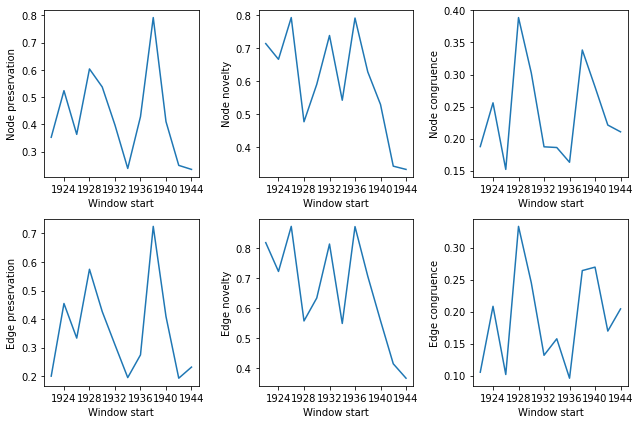

In [13]:
corrnet.plot_network_dynamics(temporal_data)

### Plot network properties over time

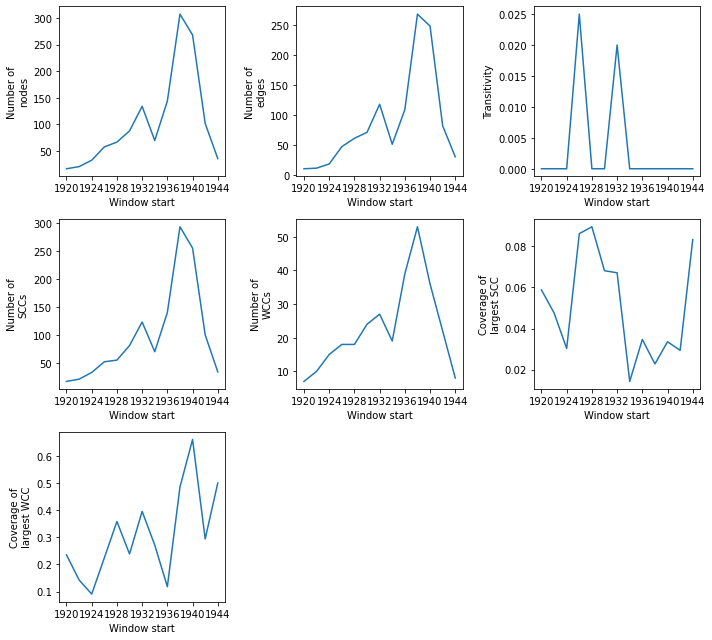

In [14]:
corrnet.plot_network_properties(temporal_data, figsize=(10,9))

### Plot Pagerank centralities of selected nodes over time

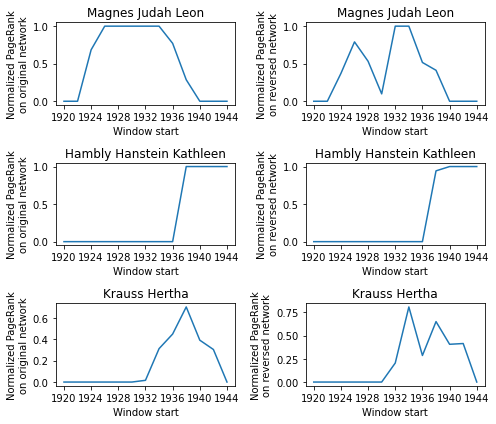

In [15]:
corrnet.plot_pagerank(temporal_data, nodes=['Magnes Judah Leon', 'Hambly Hanstein Kathleen', 'Krauss Hertha'], figsize=(7,6))